
First 5 rows:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data column

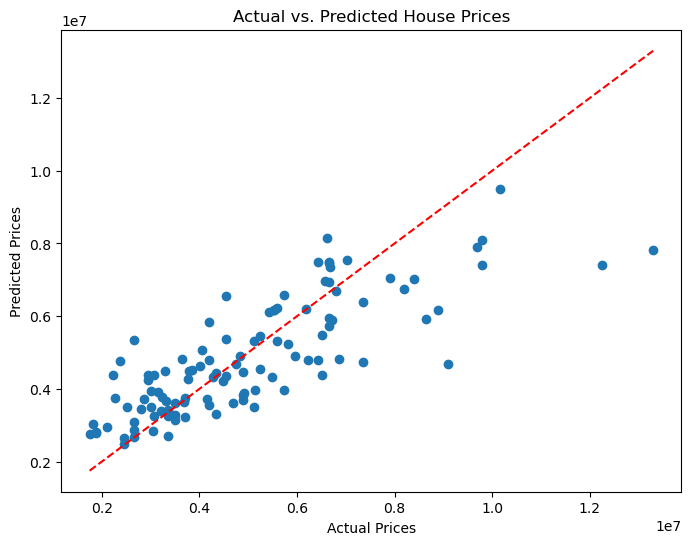

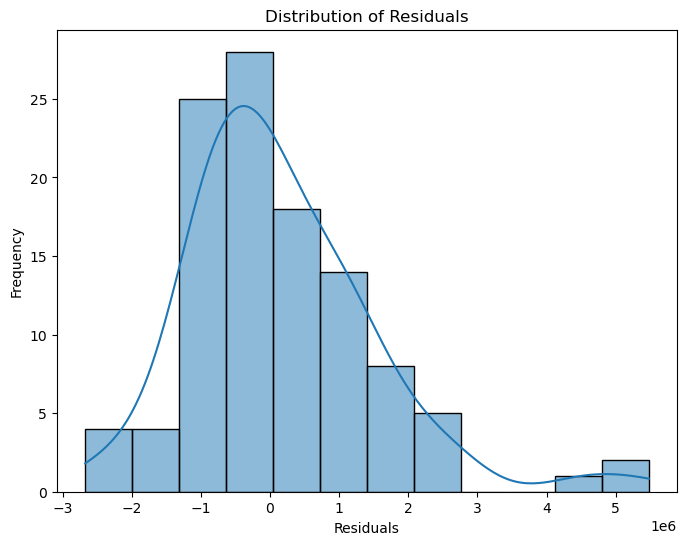


--- Coefficient Interpretation ---
Coefficients:
area: 257.94
bedrooms: 93469.79
bathrooms: 1136806.12
stories: 386541.89
mainroad_yes: 423879.71
guestroom_yes: 200443.94
basement_yes: 386999.82
hotwaterheating_yes: 746424.80
airconditioning_yes: 842378.91
prefarea_yes: 634199.31
furnishingstatus_semi-furnished: -147505.72
furnishingstatus_unfurnished: -467684.11
Intercept: 200090.1897022901

--- Feature Importance (Unscaled) ---
                            Feature   Coefficient
2                         bathrooms  1.136806e+06
8               airconditioning_yes  8.423789e+05
7               hotwaterheating_yes  7.464248e+05
9                      prefarea_yes  6.341993e+05
4                      mainroad_yes  4.238797e+05
6                      basement_yes  3.869998e+05
3                           stories  3.865419e+05
5                     guestroom_yes  2.004439e+05
1                          bedrooms  9.346979e+04
0                              area  2.579417e+02
10  furnishings

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

try:
    data = pd.read_csv('house_prices.csv')
except FileNotFoundError:
    print("Error: 'house_prices.csv' not found.")
    exit()

print("\nFirst 5 rows:\n", data.head())
print("\nData Info:\n", data.info())
print("\nData Description:\n", data.describe())

print("\n--- Missing Values Check ---")
print(data.isnull().sum())

data = data.dropna()
print("\nMissing values after handling:\n", data.isnull().sum())

features = ['area', 'bedrooms', 'bathrooms', 'stories']
target = 'price'

data = pd.get_dummies(data, columns=['mainroad', 'guestroom', 'basement',
                                       'hotwaterheating', 'airconditioning',
                                       'prefarea', 'furnishingstatus'], drop_first=True)

features.extend([col for col in data.columns if col.startswith('mainroad_') or
                 col.startswith('guestroom_') or col.startswith('basement_') or
                 col.startswith('hotwaterheating_') or col.startswith('airconditioning_') or
                 col.startswith('prefarea_') or col.startswith('furnishingstatus_')])

features = [f for f in features if f not in ['mainroad', 'guestroom', 'basement',
                                            'hotwaterheating', 'airconditioning',
                                            'prefarea', 'furnishingstatus']]

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print("MAE:", mae)
print("MSE:", mse)
print("R^2:", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()

plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

print("\n--- Coefficient Interpretation ---")
print("Coefficients:")
for i, feature in enumerate(features):
    print(f"{feature}: {model.coef_[i]:.2f}")
print("Intercept:", model.intercept_)

print("\n--- Feature Importance (Unscaled) ---")
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coef_df.sort_values(by='Coefficient', ascending=False))